-> Chargement des librairies et fonctions

In [1]:
# fonctions utilities (affichage, confusion, etc.)
from Fonction.MyNLPUtilities import *
# fonctions utilities (fonction de clean, import etc etc)
from Fonction.myFonction import *

from Fonction.AllModels import *

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


-> Chargement des données brutes

In [2]:
# Init_train = pd.read_csv('./Data_brut/HAI817_Projet_train.csv', sep=",")
# Init_test = pd.read_csv('./Data_brut/HAI817_Projet_test.csv', sep=",")
# data_brute = pd.concat([Init_train,Init_test], ignore_index = True)
# data_brute = data_brute.drop_duplicates()
# print(data_brute['our rating'].value_counts())
# data_equilibre = balanceSample(data_brute,150,["false","true","mixture","other"])
# print(data_equilibre['our rating'].value_counts())
# data_equilibre.to_csv('./Data_equilibre/MyData_Sprint1.csv', sep=',', index=False)
mySample = pd.read_csv('./Data_equilibre/MyData_Sprint1.csv', sep=",")
print(mySample['our rating'].value_counts())
X_train = mySample['text']
y_train = mySample['our rating']

false      150
true       150
mixture    150
other      150
Name: our rating, dtype: int64


-> Je test tout les models

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Evaluation de  MultinomialNB
MultinomialNB : 0.447 (0.038) in 0.896 s
Evaluation de  LR
LR : 0.472 (0.039) in 15.971 s
Evaluation de  KNN
KNN : 0.350 (0.056) in 1.533 s
Evaluation de  CART
CART : 0.392 (0.055) in 15.676 s
Evaluation de  RF
RF : 0.457 (0.062) in 22.513 s
Evaluation de  SVM
SVM : 0.467 (0.044) in 544.054 s

Le meilleur resultat : 
Classifier :  LR  accuracy : 0.472  (0.039)  en 15.971   s

Tous les résultats : 

Classifier :  LR  accuracy : 0.472  (0.039)  en 15.971   s
Classifier :  SVM  accuracy : 0.467  (0.044)  en 544.054   s
Classifier :  RF  accuracy : 0.457  (0.062)  en 22.513   s
Classifier :  MultinomialNB  accuracy : 0.447  (0.038)  en 0.896   s
Classifier :  CART  accuracy : 0.392  (0.055)  en 15.676   s
Classifier :  KNN  accuracy : 0.350  (0.056)  en 1.533   s


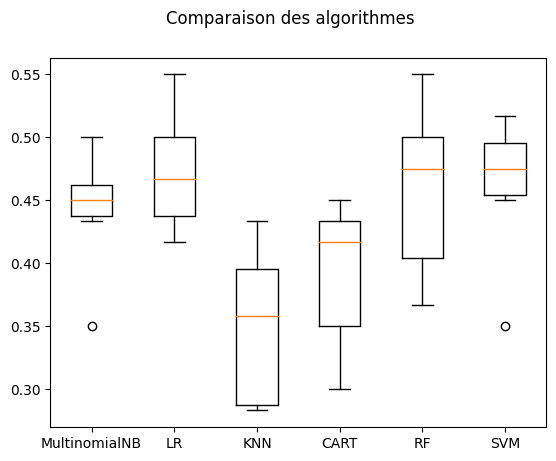

In [3]:
testAllModel(X_train,y_train,5)

-> je test les hyper-parametres de SVC

In [3]:
testSVC(X_train,y_train)

Application de gridsearch ...
pipeline : ['tfidf', 'svm']
parameters :
{'svm__C': [0.001, 0.01, 0.1, 1, 10], 'svm__gamma': [0.001, 0.01, 0.1, 1], 'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
Fitting 5 folds for each of 80 candidates, totalling 400 fits
réalisé en  93.254 s
Meilleur résultat : 0.483
Ensemble des meilleurs paramètres :
	svm__C: 10
	svm__gamma: 0.001
	svm__kernel: 'linear'

Les premiers résultats : 
     svm__C  svm__gamma svm__kernel  accuracy
77    10.0       1.000         rbf  0.483333
76    10.0       1.000      linear  0.483333
72    10.0       0.100      linear  0.483333
68    10.0       0.010      linear  0.483333
64    10.0       0.001      linear  0.483333


-> Ajuster pretraitement

In [4]:
ajustSVC(X_train, y_train,[10],[1],['rbf','linear'])

[nltk_data] Error loading omw-1.4: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     certificate has expired (_ssl.c:997)>


Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'svm']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'svm__C': [10], 'svm__gamma': [1], 'svm__kernel': ['rbf', 'linear']}
Fitting 5 folds for each of 32 candidates, totalling 160 fits
réalisé en  124.755 s
Meilleur résultat : 0.488
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: True
	cleaner__removedigit: False
	svm__C: 10
	svm__gamma: 1
	svm__kernel: 'rbf'
	tfidf__lowercase: False
	tfidf__stop_words: None

Les premiers résultats : 
     cleaner__getlemmatisation  cleaner__removedigit  svm__C  svm__gamma  \
11                       True                 False      10           1   
3                        True                  True      10           1   
25                      False                 False      10           1   
17                      False                  True      

-> enregistrement du modele SVC

Sauvegarde du modèle dans  ./Modele/Sprint1/SentimentModel_Sprint1.pkl
Chargement du modèle 

Pipeline(steps=[('cleaner', TextNormalizer(getlemmatisation=True)),
                ('tfidf', TfidfVectorizer(lowercase=False)),
                ('svm', SVC(C=10, gamma=1))])
Accuracy : 0.433
Classification Report
              precision    recall  f1-score   support

       false    0.40000   0.30769   0.34783        13
     mixture    0.27778   0.33333   0.30303        15
       other    0.71429   0.71429   0.71429        14
        true    0.38889   0.38889   0.38889        18

    accuracy                        0.43333        60
   macro avg    0.44524   0.43605   0.43851        60
weighted avg    0.43944   0.43333   0.43445        60



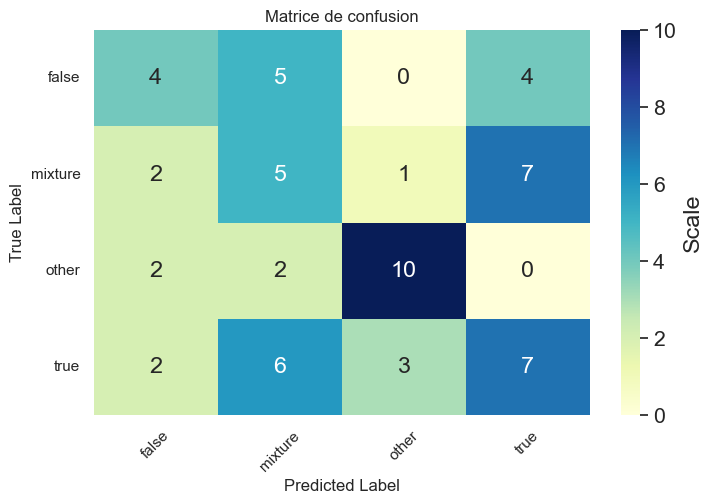

In [6]:
from sklearn.model_selection import train_test_split
import pickle
# Création d'un jeu d'apprentissage et de test
trainsize=0.9 # 70% pour le jeu d'apprentissage, il reste 30% du jeu de données pour
testsize= 0.1
seed=30

train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize)

pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=False, getlemmatisation=True)),
    ("tfidf", TfidfVectorizer(lowercase=False, stop_words=None)),
    ('svm', SVC(C=10, gamma=1, kernel='rbf'))
])
pipeline.fit(train_title,train_note)
filename='./Modele/Sprint1/SentimentModel_Sprint1.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))


print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)


# test  avec les données qu'il a apprise c'est parfait woahhha c'est beau
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)

-> Second Modèle

In [3]:
testRFC(X_train,y_train)

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'rfc']
parameters :
{'rfc__n_estimators': [500, 1200], 'rfc__max_depth': [25, 30], 'rfc__min_samples_split': [5, 10, 15], 'rfc__min_samples_leaf': [1, 2]}
Fitting 5 folds for each of 24 candidates, totalling 120 fits
réalisé en  233.126 s
Meilleur résultat : 0.488
Ensemble des meilleurs paramètres :
	rfc__max_depth: 25
	rfc__min_samples_leaf: 1
	rfc__min_samples_split: 15
	rfc__n_estimators: 500

Les premiers résultats : 
     rfc__max_depth  rfc__min_samples_leaf  rfc__min_samples_split  \
15              30                      1                      10   
4               25                      1                      15   
8               25                      2                      10   
1               25                      1                       5   
9               25                      2                      10   

    rfc__n_estimators  accuracy  
15               1200  0.488333  
4                 500  0.488

In [4]:
ajustRFC(X_train, y_train,[1200,500],[30,25],[10,15],[1])

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'rfc']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'rfc__n_estimators': [1200, 500], 'rfc__max_depth': [30, 25], 'rfc__min_samples_split': [10, 15], 'rfc__min_samples_leaf': [1]}
Fitting 5 folds for each of 128 candidates, totalling 640 fits
réalisé en  993.140 s
Meilleur résultat : 0.497
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: True
	cleaner__removedigit: False
	rfc__max_depth: 25
	rfc__min_samples_leaf: 1
	rfc__min_samples_split: 10
	rfc__n_estimators: 500
	tfidf__lowercase: False
	tfidf__stop_words: None

Les premiers résultats : 
      cleaner__getlemmatisation  cleaner__removedigit  rfc__max_depth  \
55                        True                 False              25   
51                        True                 False              25   
13                        True

Sauvegarde du modèle dans  ./Modele/Sprint1/RandomForestClassifier_Sprint1.pkl
Chargement du modèle 

Pipeline(steps=[('cleaner', TextNormalizer(getlemmatisation=True)),
                ('tfidf', TfidfVectorizer(lowercase=False)),
                ('rfc',
                 RandomForestClassifier(max_depth=25, min_samples_split=10,
                                        n_estimators=500))])
Accuracy : 0.500
Classification Report
              precision    recall  f1-score   support

       false    0.46154   0.46154   0.46154        13
     mixture    0.37500   0.40000   0.38710        15
       other    0.71429   0.71429   0.71429        14
        true    0.47059   0.44444   0.45714        18

    accuracy                        0.50000        60
   macro avg    0.50535   0.50507   0.50502        60
weighted avg    0.50159   0.50000   0.50058        60



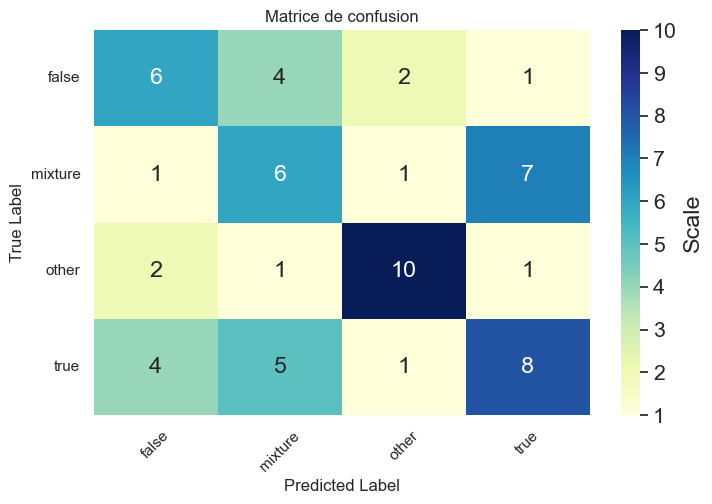

In [5]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# Création d'un jeu d'apprentissage et de test
trainsize=0.9 # 70% pour le jeu d'apprentissage, il reste 30% du jeu de données pour
testsize= 0.1
seed=30
train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize)

pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=False, getlemmatisation=True)),
    ("tfidf", TfidfVectorizer(lowercase=False, stop_words=None)),
    ('rfc', RandomForestClassifier(max_depth=25,min_samples_leaf=1, min_samples_split=10, n_estimators=500))
])
pipeline.fit(train_title,train_note)
filename='./Modele/Sprint1/RandomForestClassifier_Sprint1.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))



print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)


# test  avec les données qu'il a apprise c'est parfait woahhha c'est beau
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)

-> Le dernier modele

In [5]:
testLR(X_train,y_train)

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'lr']
parameters :
{'lr__solver': ['newton-cg', 'lbfgs', 'liblinear'], 'lr__penalty': ['l2'], 'lr__C': [100, 10, 1.0, 0.1, 0.01]}
Fitting 5 folds for each of 15 candidates, totalling 75 fits
réalisé en  37.340 s
Meilleur résultat : 0.485
Ensemble des meilleurs paramètres :
	lr__C: 10
	lr__penalty: 'l2'
	lr__solver: 'newton-cg'

Les premiers résultats : 
    lr__C lr__penalty lr__solver  accuracy
3   10.0          l2  newton-cg  0.485000
4   10.0          l2      lbfgs  0.485000
5   10.0          l2  liblinear  0.485000
8    1.0          l2  liblinear  0.485000
6    1.0          l2  newton-cg  0.481667


In [3]:
ajustLR(X_train, y_train,['liblinear','lbfgs', 'newton-cg'],['l2'],[10])

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'lr']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'lr__solver': ['liblinear', 'lbfgs', 'newton-cg'], 'lr__penalty': ['l2'], 'lr__C': [10]}
Fitting 5 folds for each of 48 candidates, totalling 240 fits
réalisé en  165.144 s
Meilleur résultat : 0.490
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: False
	cleaner__removedigit: True
	lr__C: 10
	lr__penalty: 'l2'
	lr__solver: 'liblinear'
	tfidf__lowercase: True
	tfidf__stop_words: None

Les premiers résultats : 
     cleaner__getlemmatisation  cleaner__removedigit  lr__C lr__penalty  \
25                      False                  True     10          l2   
3                        True                  True     10          l2   
10                       True                  True     10          l2   
35                      False      

Sauvegarde du modèle dans  ./Modele/Sprint1/LogisticRegression_Sprint1.pkl
Chargement du modèle 

Pipeline(steps=[('cleaner', TextNormalizer(removedigit=True)),
                ('tfidf', TfidfVectorizer()),
                ('lr', LogisticRegression(C=10, solver='liblinear'))])
Accuracy : 0.500
Classification Report
              precision    recall  f1-score   support

       false    0.38462   0.38462   0.38462        13
     mixture    0.41667   0.33333   0.37037        15
       other    0.78571   0.78571   0.78571        14
        true    0.42857   0.50000   0.46154        18

    accuracy                        0.50000        60
   macro avg    0.50389   0.50092   0.50056        60
weighted avg    0.49940   0.50000   0.49772        60



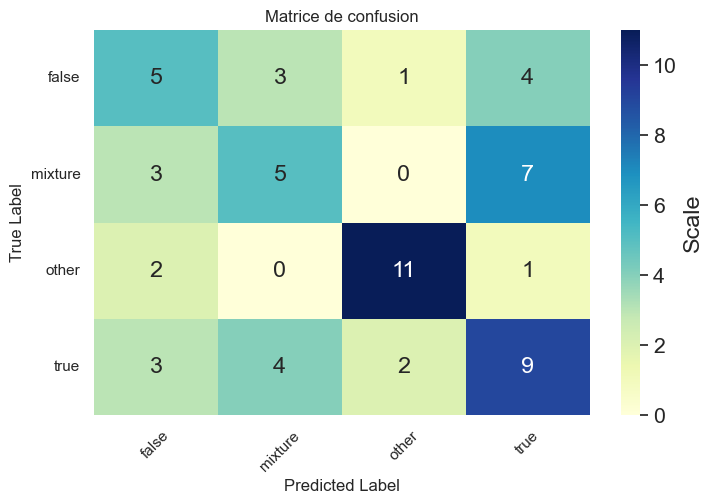

In [7]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Création d'un jeu d'apprentissage et de test
trainsize=0.9 # 70% pour le jeu d'apprentissage, il reste 30% du jeu de données pour
testsize= 0.1
seed=30
train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize)

pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=True, getlemmatisation=False)),
    ("tfidf", TfidfVectorizer(lowercase=True, stop_words=None)),
    ('lr', LogisticRegression(C=10,penalty='l2', solver='liblinear'))
])
pipeline.fit(train_title,train_note)
filename='./Modele/Sprint1/LogisticRegression_Sprint1.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))



print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)


# test  avec les données qu'il a apprise c'est parfait woahhha c'est beau
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)